## Contributors
### Jay Upadhyay
### 
###
###
###

# Libraries

In [19]:
from tensorflow import keras
from keras import utils
from keras.models import Sequential
from keras.layers import Conv2D
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import numpy as np
import h5py


In [20]:
from astroNN.datasets import load_galaxy10

with h5py.File('Galaxy10_DECals.h5', 'r') as F:
    images = np.array(F['images'])
    labels = np.array(F['ans'])

# 1. Project Proposal


# 2. Data Collection and data cleaning


In [21]:
# To convert the labels to categorical 10 classes
labels = utils.to_categorical(labels, 10)


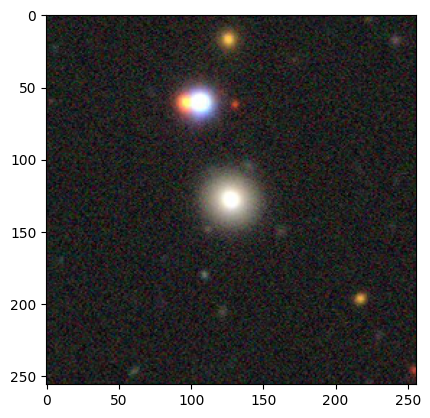

In [22]:
rand_list=[]

for i in range(5):
    rand_list.append(random.randint(0,images.shape[0]))
rand_list
plt.imshow(images[rand_list[0]])
# for x in rand_list:
#     plt.imshow(images[x])

# 3. EDA

In [23]:
images.shape
# The 21785 says there are that many images
# 69 says the pixels in the images(69x69)
# The 3 shows the bands(g,r,z) 

(17736, 256, 256, 3)

In [24]:
# To convert to desirable type
labels = labels.astype(np.float32)
images = images.astype(np.float32)

In [25]:
#Normalize images
#images=images/255


In [26]:
images.size*.8
X_train,X_test=train_test_split(images, test_size=0.2)
Y_train,Y_test=train_test_split(labels, test_size=0.2)

In [27]:
model=Sequential()
model.add(Conv2D(32,kernel_size=3,activation="tanh"))
#model.add(layers.MaxPooling2D((2, 2)))

In [28]:
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])



In [29]:
history = model.fit(X_train, Y_train, 
                    epochs=10
                )

Epoch 1/10


2022-12-02 23:55:46.360857: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


ValueError: in user code:

    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/training.py", line 998, in train_step
        return self.compute_metrics(x, y, y_pred, sample_weight)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/training.py", line 1092, in compute_metrics
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 605, in update_state
        metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/utils/metrics_utils.py", line 77, in decorated
        update_op = update_state_fn(*args, **kwargs)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/metrics/base_metric.py", line 143, in update_state_fn
        return ag_update_state(*args, **kwargs)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/metrics/base_metric.py", line 700, in update_state  **
        matches = ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/metrics/metrics.py", line 3669, in sparse_categorical_accuracy
        matches = metrics_utils.sparse_categorical_matches(y_true, y_pred)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/utils/metrics_utils.py", line 970, in sparse_categorical_matches
        matches = tf.cast(tf.equal(y_true, y_pred), backend.floatx())

    ValueError: Dimensions must be equal, but are 10 and 254 for '{{node Equal}} = Equal[T=DT_FLOAT, incompatible_shape_error=true](IteratorGetNext:1, Cast_1)' with input shapes: [?,10], [?,254,254].


In [ ]:
model.evaluate(X_test,Y_test)

# 4. Techniques Used

# 5. Project Proposal